In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [ ]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=41)

<Axes: >

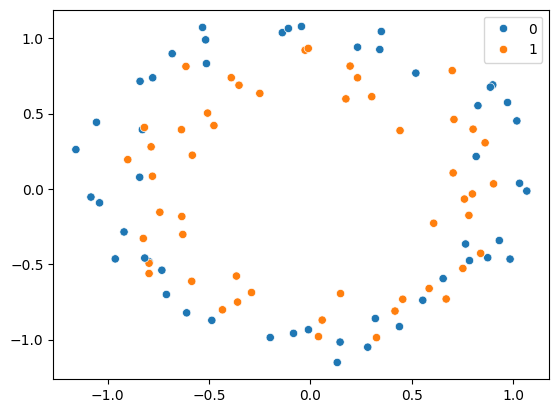

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=41)

In [ ]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=1)

Streaming output truncated to the last 5000 lines.
Epoch 1001/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8406 - loss: 0.3058 - val_accuracy: 0.7000 - val_loss: 0.6168
Epoch 1002/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8250 - loss: 0.3309 - val_accuracy: 0.7000 - val_loss: 0.6178
Epoch 1003/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8445 - loss: 0.3066 - val_accuracy: 0.7000 - val_loss: 0.6159
Epoch 1004/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.8406 - loss: 0.3097 - val_accuracy: 0.7000 - val_loss: 0.6169
Epoch 1005/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8484 - loss: 0.3250 - val_accuracy: 0.7000 - val_loss: 0.6229
Epoch 1006/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8680 - loss: 0.2801 - val_accuracy: 0.7000 - val_loss: 0.6256
Epoch 1007/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8328 - loss: 0.3202 - val_accuracy: 0.6500 - val_loss: 0.6231
Epoch 1008/3500
3/3 ━━━━━━━━━━━━━━━━━━━

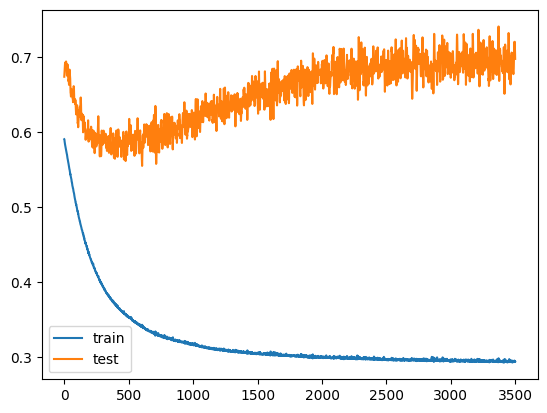

In [12]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


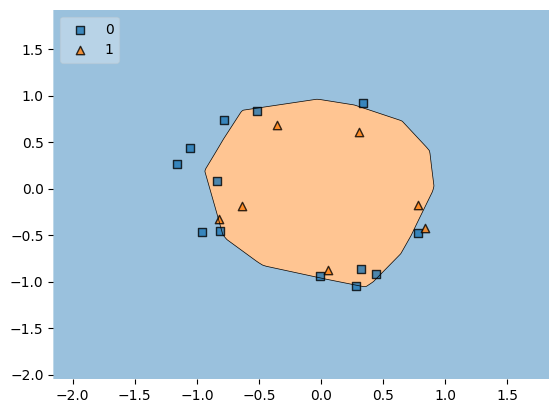

In [13]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Using Early Stopping

In [14]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=30,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

In [21]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5531 - loss: 0.6840 - val_accuracy: 0.3000 - val_loss: 0.7345
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5828 - loss: 0.6737 - val_accuracy: 0.2500 - val_loss: 0.7358
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5945 - loss: 0.6738 - val_accuracy: 0.2500 - val_loss: 0.7364
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5906 - loss: 0.6721 - val_accuracy: 0.2500 - val_loss: 0.7367
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6023 - loss: 0.6738 - val_accuracy: 0.2500 - val_loss: 0.7368
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6180 - loss: 0.6682 - val_accuracy: 0.2500 - val_loss: 0.7373
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5906 - loss: 0.6742 - val_accuracy: 0.2500 - val_loss: 0.7366
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5867 - loss: 0.6740 - val_accuracy: 0.2500 - v

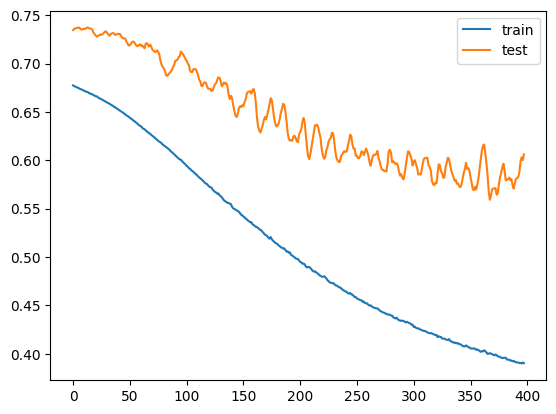

In [22]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


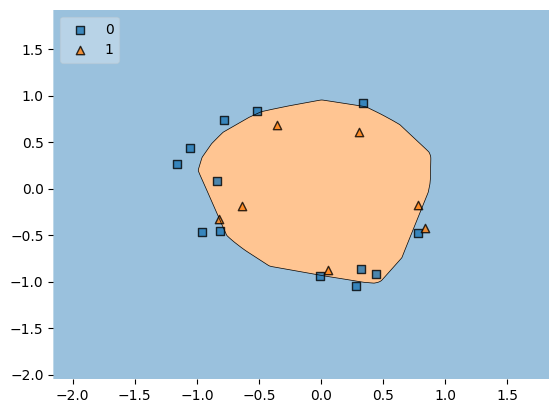

In [23]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()